# Statistics - 2021 Olympics in Tokyo

In [1]:
import pandas as pd
import numpy as np

In [3]:
medal_count = pd.read_csv('Medals.csv', encoding = "Latin-1")
medal_count

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


## Estimates of Location

### Mean

In [5]:
medal_count["Total"].mean()

11.612903225806452

### Weighted Mean

In [6]:
np.average(medal_count["Total"], weights = medal_count["Gold"])

46.832352941176474

### Trimmed Mean

In [9]:
from scipy.stats import trim_mean
trim_mean(medal_count["Gold"], 0.1)

1.96

### Median



In [10]:
medal_count["Total"].median()

4.0

### Weighted Median

In [11]:
def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum()/2
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count, "Total", "Gold")

40

### Percentile

In [12]:
q3 = np.percentile(medal_count["Total"], 75)
q3

11.0

### Complete Description

In [13]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability

### Variance

In [15]:
from statistics import variance
variance(medal_count["Gold"])

49.315100514259

### Standard Deviation

In [17]:
from statistics import stdev
stdev(medal_count["Gold"])

7.022471111671376

### Mean Absolute Deviation

In [18]:
from numpy import mean, absolute
mean(absolute(medal_count["Gold"] - mean(medal_count["Gold"])))

4.0048560527228485

### Mean Absolute Deviation

In [19]:
from numpy import median, absolute
median(absolute(medal_count["Gold"] - median(medal_count["Gold"])))

1.0

In [20]:
q3, q1 = np.percentile(medal_count["Gold"], [75, 25])
iqr = q3 - q1
iqr

3.0

## Exploring Data Distribution

### Box plot

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

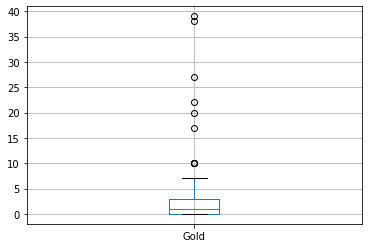

In [21]:
medal_count.boxplot(column="Gold", by = None, ax = None)

### Frequency table

In [23]:
frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"], 10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


### Histogram

(array([72., 11.,  4.,  0.,  1.,  2.,  1.,  0.,  0.,  2.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <BarContainer object of 10 artists>)

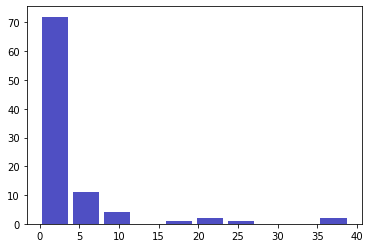

In [27]:
import matplotlib.pyplot as plt
plt.hist(x=medal_count["Gold"], bins=10, color='#0504aa', alpha=0.7, rwidth=0.85)

### Density Plot

<AxesSubplot:ylabel='Density'>

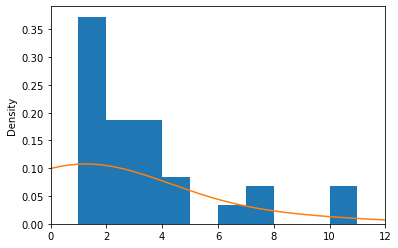

In [30]:
ax=medal_count["Gold"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
medal_count["Gold"].plot.density(ax=ax)

## Exploring Binary and Categorical Data

### Mode

In [31]:
medal_count["Gold"].mode()

0    0
dtype: int64

### Bar Charts

Text(0.5, 0, 'Country')

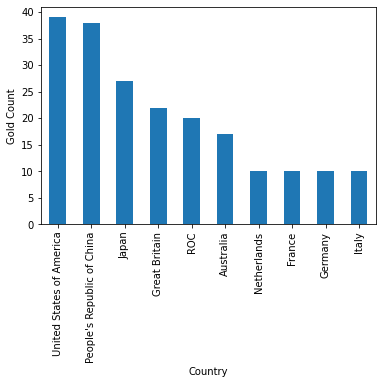

In [33]:
ax = medal_count.iloc[:10, :].plot.bar(x="Team/NOC", y="Gold", legend=False)
ax.set_ylabel("Gold Count")
ax.set_xlabel("Country")

### Pie Charts

([<matplotlib.patches.Wedge at 0x1a94eb34730>,
 [Text(-0.6243322674600585, 0.9056540287594277, 'United States of America'),
  Text(-1.0724207066739067, -0.2447730130080495, "People's Republic of China"),
  Text(-0.3673213244876795, -1.0368582567432336, 'Japan'),
  Text(0.4463732217985583, -1.0053611027194036, 'Great Britain'),
  Text(0.9637732416311904, -0.530227440553304, 'ROC'),
  Text(1.0973336402954277, 0.0765433333216221, 'Australia'),
  Text(0.9718633010825214, 0.5152491863253977, 'Netherlands'),
  Text(0.7687373318657108, 0.7867928028369274, 'France'),
  Text(0.49255203101681844, 0.9835611301496249, 'Germany'),
  Text(0.1695555234157106, 1.0868536812649736, 'Italy')],
 [Text(-0.3405448731600319, 0.4939931065960514, '19.2%'),
  Text(-0.5849567490948582, -0.13351255254984515, '18.7%'),
  Text(-0.2003570860841888, -0.5655590491326727, '13.3%'),
  Text(0.2434763027992136, -0.5483787833014928, '10.8%'),
  Text(0.5256944954351946, -0.2892149675745294, '9.9%'),
  Text(0.598545621979324

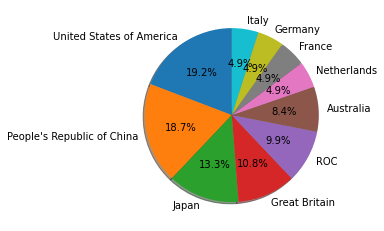

In [37]:
pie_data = medal_count.iloc[:10, :]

plt.pie(pie_data["Gold"], labels=pie_data["Team/NOC"], autopct='%1.1f%%', shadow=True, startangle=90)

## Correlation

### Correlation Matrix

In [38]:
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

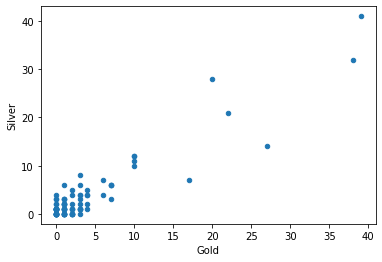

In [39]:
medal_count.plot.scatter(x="Gold", y="Silver")

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

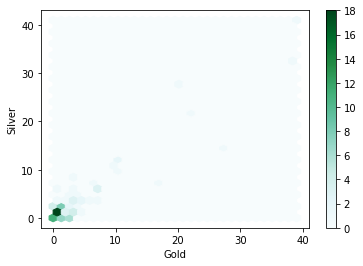

In [40]:
medal_count.plot.hexbin(x="Gold", y="Silver", gridsize=30, sharex=False)

### Contour Plots

C:\Users\Jidnya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

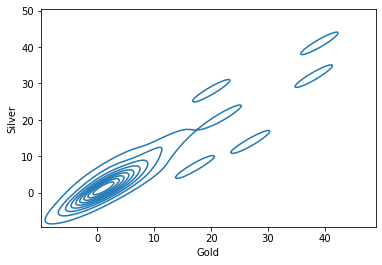

In [42]:
import seaborn as sns
ax = sns.kdeplot(medal_count["Gold"], medal_count["Silver"])
ax

### HeatMap

<AxesSubplot:>

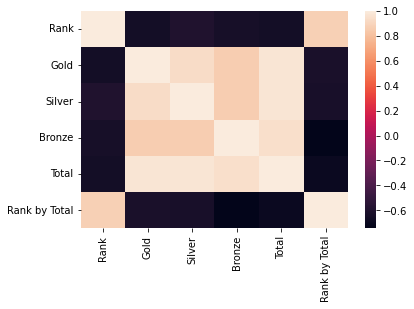

In [43]:
sns.heatmap(medal_count.corr())

### Contingency Table

In [50]:
crosstab = medal_count[["Silver", "Gold"]].pivot_table(index='Silver', columns='Gold', aggfunc=lambda x:len(x), margins=True)
crosstab.fillna(0, inplace=False)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Violin Plot

<AxesSubplot:xlabel='Gold'>

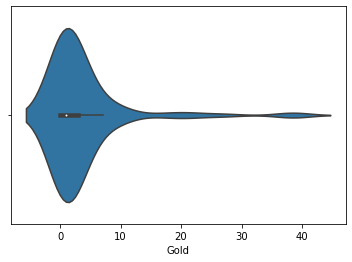

In [51]:
sns.violinplot(x=medal_count["Gold"])